In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature


In [2]:
data_dir = '/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/'
data = pd.read_csv(data_dir+'station_info_temp_revised.csv')
shape = '/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/Study_Area_08_01_17.shp'
#station_info = '/Volumes/ATLAS/ghcn_daily/extra/ghcnd-stations_CSV.csv'

In [3]:
info = pd.read_csv(station_info, encoding="latin-1", header = None)

In [4]:
id_initial = list(map(lambda x: x.split(':'),data['descriptio']))


In [5]:
station_id = list(map(lambda x: x[2].split('<')[0],id_initial))

In [3]:
data

,Unnamed: 0,Station,lat,lon,elevation
0,0,CA003010060,53.1167,-111.1833,658.0
1,1,CA003010160,52.4333,-111.7833,716.0
2,2,CA003010162,52.3167,-111.7833,737.0
3,3,CA003010164,52.3833,-111.8000,732.0
4,4,CA003010175,52.4167,-111.7833,713.0
5,5,CA003010232,52.6833,-111.1167,701.0
6,6,CA003010234,54.0167,-112.2333,610.0
7,7,CA003010237,53.9167,-112.2833,625.0
8,11,CA003010650,52.5833,-111.4667,721.0
9,12,CA003010698,53.3833,-111.7667,689.0


In [6]:
info.columns = ['station','lat','lon','elevation','e','f','g','h']

In [7]:
df = info[['station','lat','lon','elevation']]

In [8]:
test = df[df['station'].isin(station_id)]

In [51]:
test.to_csv(data_dir+'NGP_basic_station_info.csv')

In [ ]:
len(station_id)

In [5]:
ext_e = -92
ext_w = -115
ext_n = 55
ext_s = 40

In [9]:
#new_data = pd.read_csv('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/station_info_temp.csv')

In [10]:
#test = new_data

,Unnamed: 0,Unnamed: 0.1,station,lat,lon,elevation
0,228,78779,USC00134874,41.8264,-96.0506,312.4
1,229,78903,USC00137702,42.3964,-96.3778,335.3
2,230,81805,USC00210974,46.3047,-96.5217,296.0
3,231,81808,USC00211063,45.5958,-96.8283,298.1
4,232,81817,USC00211263,44.7183,-96.2697,368.8
5,233,81855,USC00212038,44.9317,-96.0450,321.6
6,234,81913,USC00213455,48.7714,-96.9406,248.4
7,235,81918,USC00213587,46.8833,-96.2500,355.1
8,236,81949,USC00214373,45.3533,-94.3056,353.6
9,237,81973,USC00214861,45.9647,-94.8892,408.4


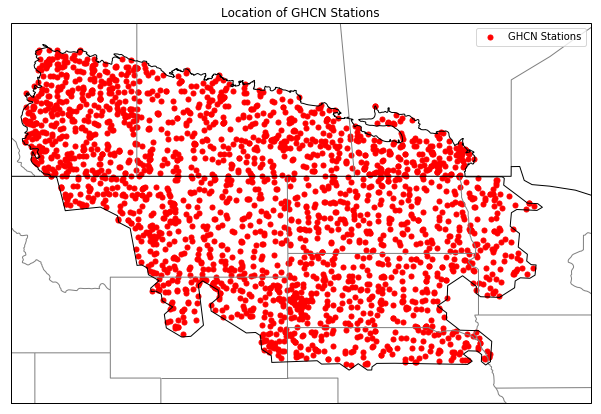

In [6]:
fig, ax = plt.subplots()
projection1 = ccrs.PlateCarree()
ax = plt.axes(projection=projection1)
ax.set_global()
ax.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.scatter(data['lon'].values, data['lat'].values, marker='.', s=100, color='red',transform=projection1, label='GHCN Stations')

shape_feature = ShapelyFeature(Reader(shape).geometries(),
                                projection1,facecolor=None)

ax.add_feature(shape_feature, edgecolor='black', facecolor=(0,0,0,0))
ax.legend()
fig.set_size_inches(13,7)
fig.set_dpi=1200.0
ax.set_title('Location of GHCN Stations')
#plt.savefig(data_dir+'study_area_map.png')
plt.show()